In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [27]:
df = pd.read_csv(r"E:\Data Science by SRK\PROJECTS\other_data\Classification_project\cleaned_dataset_mental_health.csv")

In [28]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,1,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4,0
1,4,1,4,3,0,1,0,0,0,0,0,0,0,0,4,2,5,1
2,3,2,3,3,1,0,0,0,1,1,0,1,1,0,6,5,7,2
3,4,1,4,2,1,1,1,0,1,0,0,0,0,0,3,2,2,0
4,4,3,3,3,0,0,0,0,0,0,0,1,1,1,5,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2,1,4,3,0,1,0,0,1,0,1,0,0,1,2,5,3,1
116,3,4,3,1,1,0,0,0,0,1,0,0,0,1,6,7,8,2
117,4,4,4,3,1,0,1,1,0,0,0,1,0,1,1,5,3,0
118,4,4,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sadness              120 non-null    int64
 1   Euphoric             120 non-null    int64
 2   Exhausted            120 non-null    int64
 3   Sleep dissorder      120 non-null    int64
 4   Mood Swing           120 non-null    int64
 5   Suicidal thoughts    120 non-null    int64
 6   Anorxia              120 non-null    int64
 7   Authority Respect    120 non-null    int64
 8   Try-Explanation      120 non-null    int64
 9   Aggressive Response  120 non-null    int64
 10  Ignore & Move-On     120 non-null    int64
 11  Nervous Break-down   120 non-null    int64
 12  Admit Mistakes       120 non-null    int64
 13  Overthinking         120 non-null    int64
 14  Sexual Activity      120 non-null    int64
 15  Concentration        120 non-null    int64
 16  Optimisim            120 n

In [30]:
df['Expert Diagnose'].unique()

array([0, 1, 2, 3], dtype=int64)

In [31]:
df['Expert Diagnose'].value_counts()

Expert Diagnose
0    31
1    31
3    30
2    28
Name: count, dtype: int64

# X and y

In [32]:
X = df.drop('Expert Diagnose', axis = 1)
y = df['Expert Diagnose']

# Train_Test_Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Modelling


**Logistic regression(BaseLine model)**

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# Evaluation

**Train**

In [35]:
# Prediction
ypred_train = log_reg.predict(X_train)

# train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(y_train, ypred_train))

# cross alidation score
from sklearn.model_selection import cross_val_score
print("CV SCORE : ", cross_val_score(log_reg, X_train, y_train, cv = 5, scoring = 'accuracy').mean())


Train Accuracy :  0.9270833333333334
CV SCORE :  0.71


**Test**

In [36]:
ypred_test = log_reg.predict(X_test)
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))


Test Accuracy :  0.9166666666666666


# Confusion Metrics

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[8, 0, 0, 0],
       [0, 1, 0, 1],
       [1, 0, 6, 0],
       [0, 0, 0, 7]], dtype=int64)

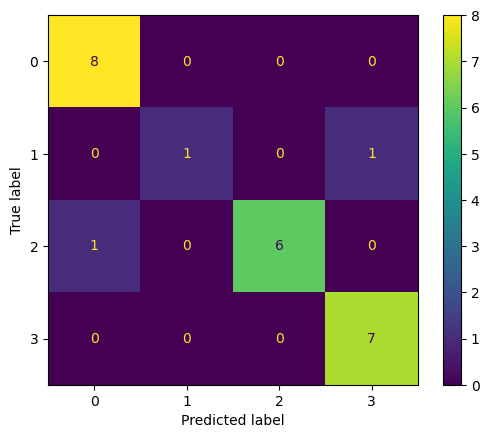

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels = df['Expert Diagnose'].unique()).plot()
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.50      0.67         2
           2       1.00      0.86      0.92         7
           3       0.88      1.00      0.93         7

    accuracy                           0.92        24
   macro avg       0.94      0.84      0.87        24
weighted avg       0.93      0.92      0.91        24

